# Exercicio de Classificação


Para este projeto, exploraremos os dados disponíveis publicamente em [LendingClub.com](www.lendingclub.com). O Lending Club conecta pessoas que precisam de dinheiro (mutuários) às pessoas que têm dinheiro (investidores). Um investidor, deseja investir apenas em pessoas que tenham um perfil de alta probabilidade para pagar de volta. Vamos tentar criar um modelo que ajude a prever isso.

Usaremos dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o devedor pagou ou não o empréstimo na íntegra. 

Aqui está o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito de LendingClub.com e 0 caso contrário.
* propósito: A motivação para o empréstimo (recebe os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").
* int.rate: A taxa de juros do empréstimo, como proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados pela LendingClub.com como sendo mais arriscados recebem taxas de juros mais altas.
* parcela: as parcelas mensais devidas pelo mutuário, se o empréstimo for financiado.
* log.annual.inc: O logaritmo natural da renda anual autorreferida do mutuário.
* dti: O rácio dívida / rendimento do mutuário (montante da dívida dividido pelo rendimento anual).
* fico: A pontuação de crédito do mutuário.
* days.with.cr.line: O número de dias que o mutuário teve uma linha de crédito.
* revol.bal: o saldo rotativo do mutuário (quantia não paga no final do ciclo de faturamento do cartão de crédito).
* revol.util: A taxa de utilização da linha de crédito do tomador (o valor da linha de crédito utilizada em relação ao crédito total disponível).
* inq.last.6mths: O número de pedidos do mutuário aos credores nos últimos 6 meses.
* delinq.2yrs: O número de vezes que o mutuário tinha 30 ou mais dias de atraso em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (pedidos de falência, penhoras fiscais ou julgamentos).

# Atividades

 * **1. Importe o data set chamado loan_data.csv**
     * **1.1. Como está o balanceamento das classes?**
 * **2. Realize o tratamento que você julgar mais adequado aos dados**     
 * **3. Defina o modelo de [regressão logística](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) e realize a classificação **
 * **4. Defina o modelo de [árvore de decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) e realize a classificação**
 * **5. Defina o modelo de [random forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) e realize a classificação**
     * *5.1 Análise o tempo de criação dos modelos e o tempo de predição para uma nova amostra? Há diferenças significativas?*
     * *5.2 Construa um dataframe, ou uma tabela, ou um gráfico com as features mais importantes e as features de maior coeficiente, para RL. As interpretações são semelhantes?*
     * *5.3 [Plot a árvore de decisão](http://scikit-learn.org/stable/modules/tree.html), gerada no passo 4. Se você brincar com os parâmetros perceberá bias e o variance presente?*
 * **6. Adicione uma combinação aos parametros dos algoritmos com o GridSearch e aplique também o CrossValidation, cv=10**
 * **7. Quais os parâmetros dos algoritmos baseados em árvore podem provocar o overfitting e underfitting? Justique sua resposta com base em experimentos.**
 * *7.1 Faça uma tabela ou gráficos, no mínimo 2 gráficos com análise do bias vs variance, sobre os dados de treinamento e de teste, para um ou mais hiperparâmetros e/ou para a quantidade de amostras que mostra a evolução/erro do modelo (com base na métrica que você definir) a medida que novas amostras são passadas para ele. [Você pode utilizar curvas de aprendizagem para os gráficos](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) *
 * **8. Vamos fazer algo diferente! Recupere as features mais importantes de um dos modelos baseado em árvore e treinar um novo modelo, de regressão logística, apenas com estas features. O modelo melhorou ou piorou? A métrica a ser avaliada deve ser a [área  sob a curva ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) **
 * *8.1 Outra forma interessante de propor uma processo de feature engineering, seria aplicar o PCA apenas sobre os dados numéricos e após isto aplicar os demais tratamento dos dados. Lembre-se de normalizar os dados antes de aplicar o PCA.
 * *8.2 Plot a área sob a [curva ROC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)*
 * **9. Como investidor você não quer emprestar o dinheiro para pessoas que não possam pagar, ou seja, você quer evitar a todo custo os maus pagadores, não importa o resto ... Qual a melhor métrica para avaliar? Qual o melhor modelo considerando esta métrica? **
 * **10. Construa um modelo ensemble com RL e Random Forest**

# Great Job!

##### 1. Importe o data set chamado loan_data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
dataset = pd.read_csv('loan_data.csv')
dataset.shape

(9578, 14)

In [2]:
#Verificando as primeiras linhas do dataframe 
dataset.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [3]:
#Verificando os tipos dos dados
dataset.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#### 1.1. Como está o balanceamento das classes?

In [4]:
#Criando função para verificar o balanceamento das classes 
def balancClasses(classe):
    print(dataset.groupby(classe).size())

In [5]:
#Verificando o nome das colunas
dataset.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
#Separando as colunas que são categoricas
colunasCategorias = ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']
colunasCategorias

['credit.policy',
 'purpose',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [7]:
#Verificando o balanceamento das classes das colunas categoricas
for i in (colunasCategorias):
    balancClasses(i)
    print()

credit.policy
0    1868
1    7710
dtype: int64

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64

inq.last.6mths
0     3637
1     2462
2     1384
3      864
4      475
5      278
6      165
7      100
8       72
9       47
10      23
11      15
12      15
13       6
14       6
15       9
16       3
17       2
18       4
19       2
20       1
24       2
25       1
27       1
28       1
31       1
32       1
33       1
dtype: int64

delinq.2yrs
0     8458
1      832
2      192
3       65
4       19
5        6
6        2
7        1
8        1
11       1
13       1
dtype: int64

pub.rec
0    9019
1     533
2      19
3       5
4       1
5       1
dtype: int64

not.fully.paid
0    8045
1    1533
dtype: int64



In [8]:
#Verificando se o dataframe possui valores missing
dataset.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

#### 2. Realize o tratamento que você julgar mais adequado aos dados

In [9]:
from sklearn.utils import resample

In [10]:
# Separando a maioria e a minoria das classes
df_maioria = dataset[dataset["credit.policy"]==1]
df_minoria = dataset[dataset["credit.policy"]==0]

qtd_maioria = len(df_maioria)
qtd_minoria = len(df_minoria)
 
# Upsample da classe minoria
df_minoria_upsampled = resample(df_minoria, 
                         replace=True,     
                         n_samples=qtd_maioria,    
                         random_state=50) 
 
# Combinando a classe maioria com upsampled da classe minoria
df_upsampled = pd.concat([df_maioria, df_minoria_upsampled])
 
# Valores
df_upsampled["credit.policy"].value_counts()

1    7710
0    7710
Name: credit.policy, dtype: int64

In [11]:
#Realizando One-Hot Encode
purpose_com_hot = pd.get_dummies(df_upsampled["purpose"])

In [12]:
purpose_com_hot.head(2)

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0


In [13]:
purpose_com_hot.dtypes

all_other             uint8
credit_card           uint8
debt_consolidation    uint8
educational           uint8
home_improvement      uint8
major_purchase        uint8
small_business        uint8
dtype: object

In [14]:
purpose_com_hot.shape

(15420, 7)

In [15]:
df_upsampled.shape

(15420, 14)

In [16]:
#Unificando os dataframes
datasetUnificado = pd.concat([df_upsampled,purpose_com_hot],axis=1)

In [17]:
datasetUnificado.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0


In [18]:
datasetUnificado.shape

(15420, 21)

In [19]:
#Separandop X e Y
Y = datasetUnificado["credit.policy"]
X = datasetUnificado.drop(["credit.policy"],axis=1)
X = X.drop(["purpose"],axis=1)

#### 3. Defina o modelo de regressão logística e realize a classificação

In [20]:
# Import dos módulos
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics

/home/ramses/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
modelo = LogisticRegression()

In [22]:
teste_size = 0.3

X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = 24)

In [23]:
modelo.fit(X_treino,Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot de uma Confusion Matrix
# Cm é a matriz de confusão, os nomes são os nomes das classes
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Label Observado')
    plt.xlabel('Label Previsto')
    

# Plot de uma ROC. pred (previsões), y (valor observado)
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label = 'Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    
# Encoding dos valores de texto para índices (ou seja, [1], [2], [3] para vermelho, verde, azul por exemplo).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


Quantidade de Registros Treino:  10794

---
Quantidade de Registros de Teste:  4626

---
Acurácia Final: 0.8030696065715521
Confusion Matrix 
[[1771  577]
 [ 334 1944]]


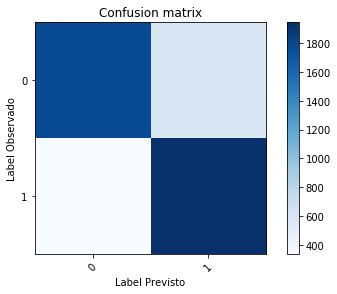

In [25]:
print("Quantidade de Registros Treino: ", X_treino.shape[0])
print()
print("---")
print("Quantidade de Registros de Teste: ", X_teste.shape[0])
print()
print("---")


modelo.fit(X_treino, Y_treino)
result = modelo.score(X_teste, Y_teste)

previsoes = modelo.predict(X_teste)

credit = encode_text_index(datasetUnificado,'credit.policy')

#y_compare = np.argmax(Y_teste,axis=1)
score = metrics.accuracy_score(Y_teste, previsoes)
print("Acurácia Final: {}".format(score))

# Confusion matrix
cm = confusion_matrix(Y_teste, previsoes)
np.set_printoptions(precision=2)
print('Confusion Matrix ')
print(cm)
plt.figure()
plot_confusion_matrix(cm, credit)
plt.show()

#### 4. Defina o modelo de árvore de decisão e realize a classificação

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
modelo_dtc = DecisionTreeClassifier()

In [28]:
modelo_dtc.fit(X_treino,Y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Quantidade de Registros Treino:  10794

---
Quantidade de Registros de Teste:  4626

---
Acurácia Final: 0.9948119325551232
Confusion Matrix 
[[2347    1]
 [  23 2255]]


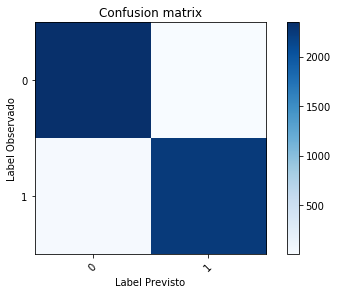

In [29]:
print("Quantidade de Registros Treino: ", X_treino.shape[0])
print()
print("---")
print("Quantidade de Registros de Teste: ", X_teste.shape[0])
print()
print("---")


result = modelo_dtc.score(X_teste, Y_teste)

previsoes = modelo_dtc.predict(X_teste)

credit = encode_text_index(datasetUnificado,'credit.policy')

#y_compare = np.argmax(Y_teste,axis=1)
score = metrics.accuracy_score(Y_teste, previsoes)
print("Acurácia Final: {}".format(score))

# Confusion matrix
cm = confusion_matrix(Y_teste, previsoes)
np.set_printoptions(precision=2)
print('Confusion Matrix ')
print(cm)
plt.figure()
plot_confusion_matrix(cm, credit)
plt.show()

#### 5. Defina o modelo de random forest e realize a classificação

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
classifier_rf = RandomForestClassifier()

In [32]:
classifier_rf.fit(X_treino,Y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Quantidade de Registros Treino:  10794

---
Quantidade de Registros de Teste:  4626

---
Acurácia Final: 0.9954604409857328
Confusion Matrix 
[[2347    1]
 [  20 2258]]


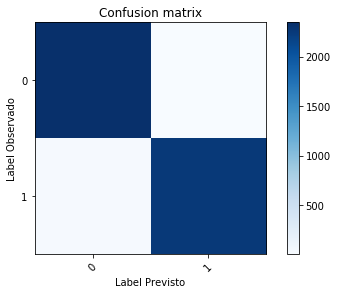

In [33]:
print("Quantidade de Registros Treino: ", X_treino.shape[0])
print()
print("---")
print("Quantidade de Registros de Teste: ", X_teste.shape[0])
print()
print("---")


result = classifier_rf.score(X_teste, Y_teste)

previsoes = classifier_rf.predict(X_teste)

credit = encode_text_index(datasetUnificado,'credit.policy')

#y_compare = np.argmax(Y_teste,axis=1)
score = metrics.accuracy_score(Y_teste, previsoes)
print("Acurácia Final: {}".format(score))

# Confusion matrix
cm = confusion_matrix(Y_teste, previsoes)
np.set_printoptions(precision=2)
print('Confusion Matrix ')
print(cm)
plt.figure()
plot_confusion_matrix(cm, credit)
plt.show()

#### 5.1 Análise o tempo de criação dos modelos e o tempo de predição para uma nova amostra? Há diferenças significativas?

In [34]:
import time

In [35]:
# Preparando os modelos ( (esta criando uma lista de modelos))
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('RFC', RandomForestClassifier()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    tempoInicio = time.time()
    modelo.fit(X_treino,Y_treino)
    tempoFim = time.time()
    tempoInicio2 = time.time()
    previsoes = modelo.predict(X_teste)
    tempoFim2 = time.time()
    score = metrics.accuracy_score(Y_teste, previsoes)
    resultados.append(score)
    nomes.append(nome)
    
    print("tempo de treinamento: {:.2f}".format(tempoFim - tempoInicio))
    print("tempo de previsão teste: {:.4f}".format(tempoFim2 - tempoInicio2))
    msg = "%s: %f" % (nome, score)
    print(msg)


tempo de treinamento: 0.08
tempo de previsão teste: 0.0006
LR: 0.803070
tempo de treinamento: 0.05
tempo de previsão teste: 0.0007
CART: 0.995460
tempo de treinamento: 0.10
tempo de previsão teste: 0.0062
RFC: 0.993731


#### 5.2 Construa um dataframe, ou uma tabela, ou um gráfico com as features mais importantes e as features de maior coeficiente, para RL. As interpretações são semelhantes?

In [36]:
features = datasetUnificado.columns.difference(['Class'])

In [37]:
classifier_rf = RandomForestClassifier()

In [38]:
classifier_rf.fit(X, Y)  # Treinando com tudo

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

fico: 36.671775%
debt_consolidation: 19.465673%
delinq.2yrs: 12.830556%
dti: 9.479384%
all_other: 6.294789%
days.with.cr.line: 6.224332%
credit_card: 3.125955%
educational: 2.326234%
credit.policy: 1.784566%
installment: 0.634833%
major_purchase: 0.226916%
home_improvement: 0.209550%
log.annual.inc: 0.208198%
revol.bal: 0.184139%
int.rate: 0.121352%
not.fully.paid: 0.084678%
pub.rec: 0.061233%
purpose: 0.033919%
inq.last.6mths: 0.031921%


In [39]:
# Eliminação Recursiva de Variáveis

# Import dos módulos

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Número de Atributos: %d" % fit.n_features_)
print(datasetUnificado.columns[0:21])
print("Atributos Selecionados: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)

Número de Atributos: 3
Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype='object')
Atributos Selecionados: [ True False False False False False False False  True False False False
 False False False False False False  True]
Ranking dos Atributos: [ 1 15 13 12 11 16 17 14  1  6  9  2  7  8  5 10  3  4  1]


#### 5.3 Plot a árvore de decisão, gerada no passo 4. Se você brincar com os parâmetros perceberá bias e o variance presente?

In [40]:
from sklearn import tree
dot_data = tree.export_graphviz(modelo_dtc, out_file=None)  

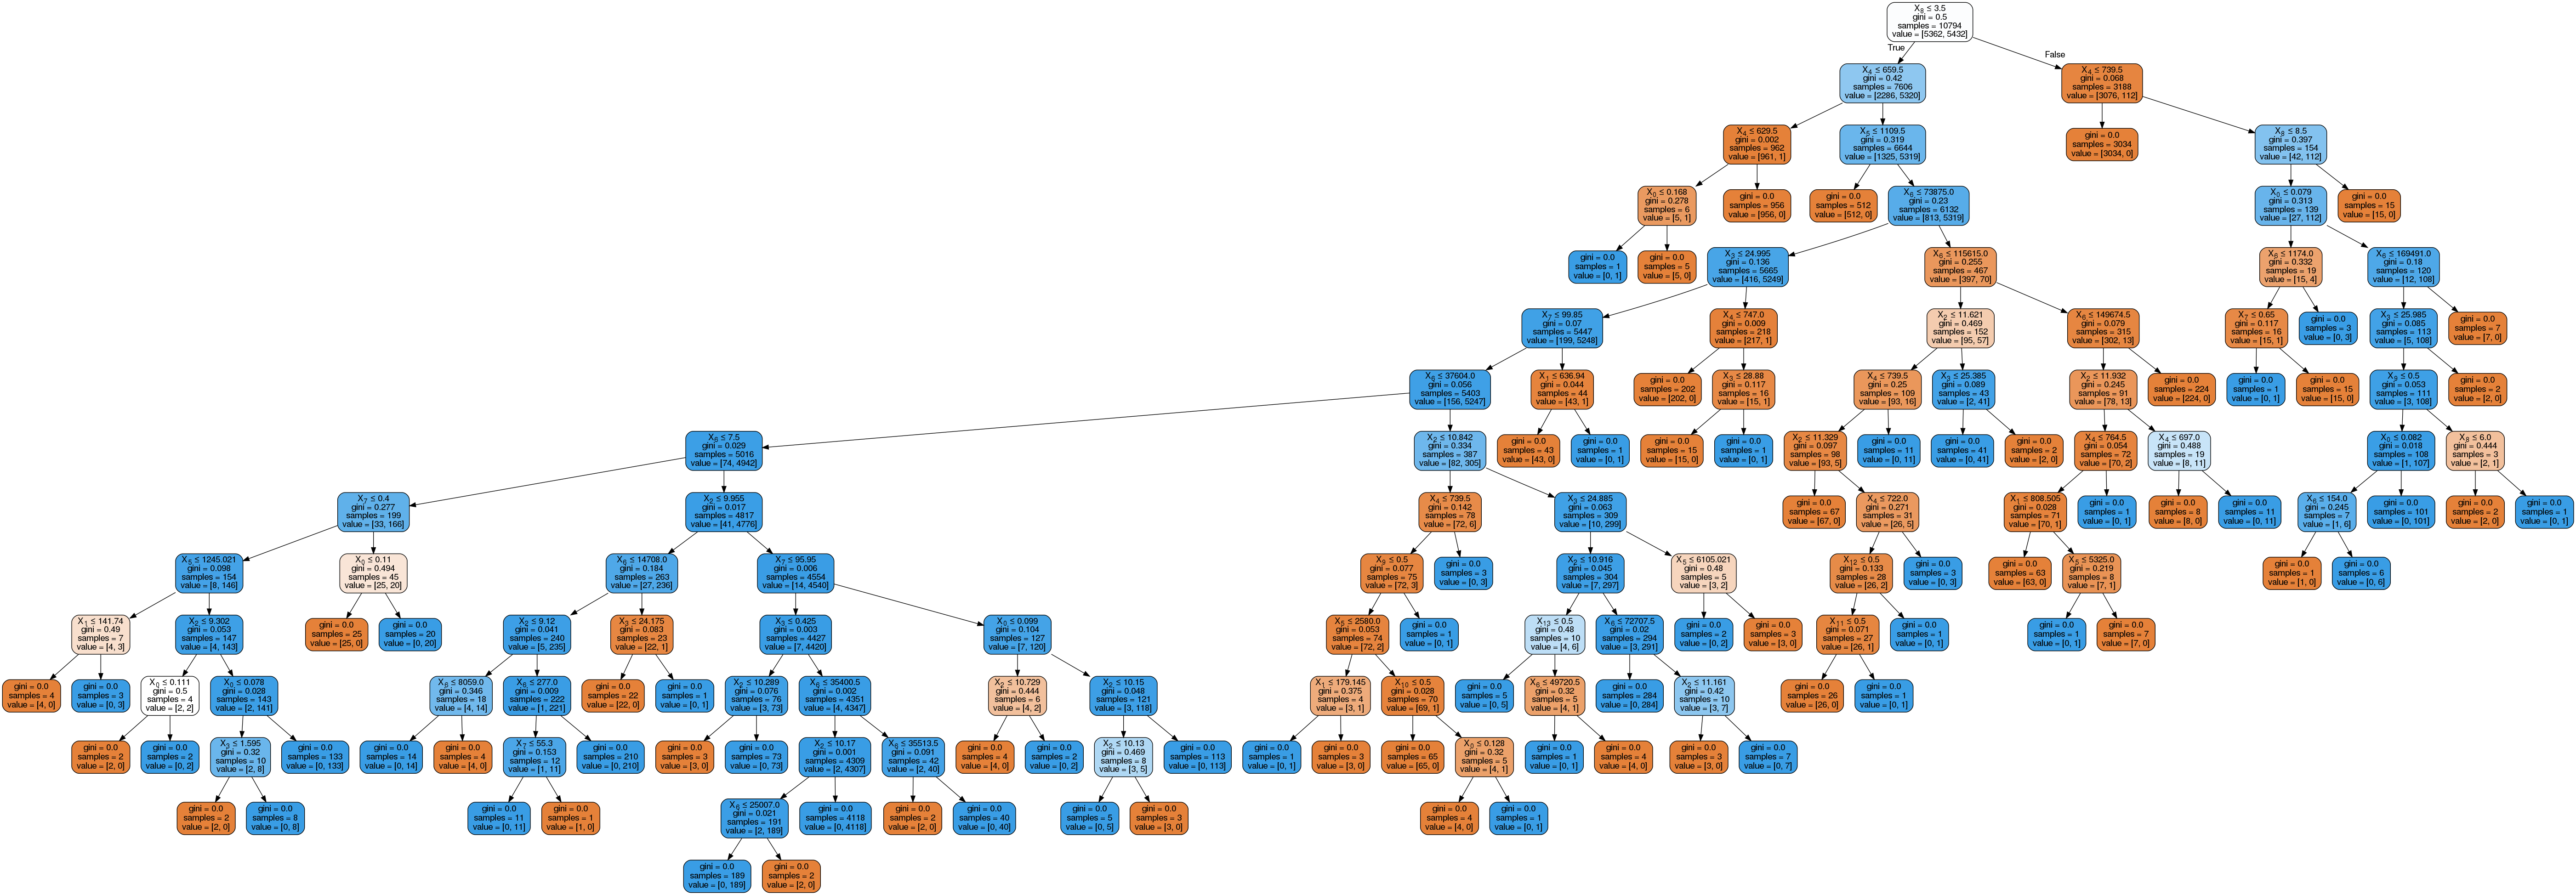

In [41]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modelo_dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 6. Adicione uma combinação aos parametros dos algoritmos com o GridSearch e aplique também o CrossValidation, cv=10

In [42]:
from sklearn.model_selection import GridSearchCV

num_folds = 10
num_instances = len(X)
seed = 7

param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [5, 10],
            "bootstrap": [False, True],
            "max_depth": [5, 10],
            "max_features": ['auto', 0.1]
}
grid_search = GridSearchCV(classifier_rf, param_grid, scoring="accuracy", cv = num_folds )
grid_search.fit(X, Y)

classifier_rf = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

({'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 10},
 0.9841115434500648)

#### 7. Quais os parâmetros dos algoritmos baseados em árvore podem provocar o overfitting e underfitting? Justique sua resposta com base em experimentos.

#### 7.1 Faça uma tabela ou gráficos, no mínimo 2 gráficos com análise do bias vs variance, sobre os dados de treinamento e de teste, para um ou mais hiperparâmetros e/ou para a quantidade de amostras que mostra a evolução/erro do modelo (com base na métrica que você definir) a medida que novas amostras são passadas para ele. Você pode utilizar curvas de aprendizagem para os gráficos

In [43]:
predictions = cross_val_predict(classifier_rf, X_treino, Y_treino, cv=3)
confusion_matrix(Y_treino, predictions)

array([[5195,  167],
       [  40, 5392]])

In [44]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_treino, predictions))
print("Recall:",recall_score(Y_treino, predictions))

Precision: 0.9699586256520957
Recall: 0.9926362297496318


In [45]:
from sklearn.metrics import f1_score
f1_score(Y_treino, predictions)

0.9811664088799928

In [46]:
from sklearn.metrics import precision_recall_curve

y_scores = classifier_rf.predict_proba(X_treino)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_treino, y_scores)

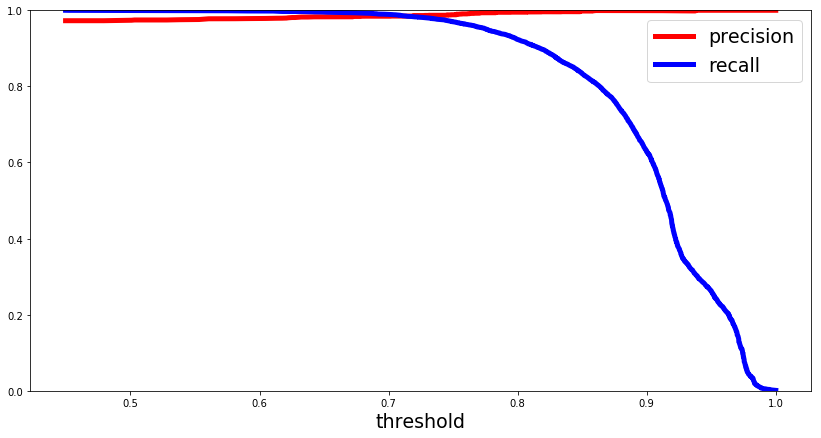

In [47]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

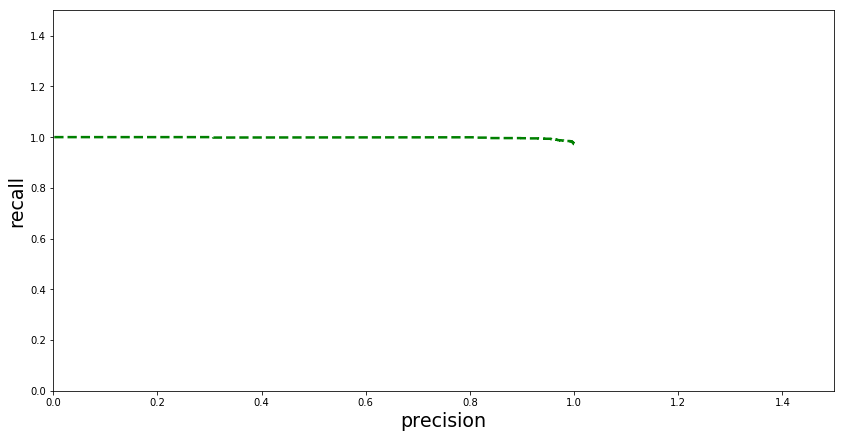

In [48]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [49]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_treino, y_scores)

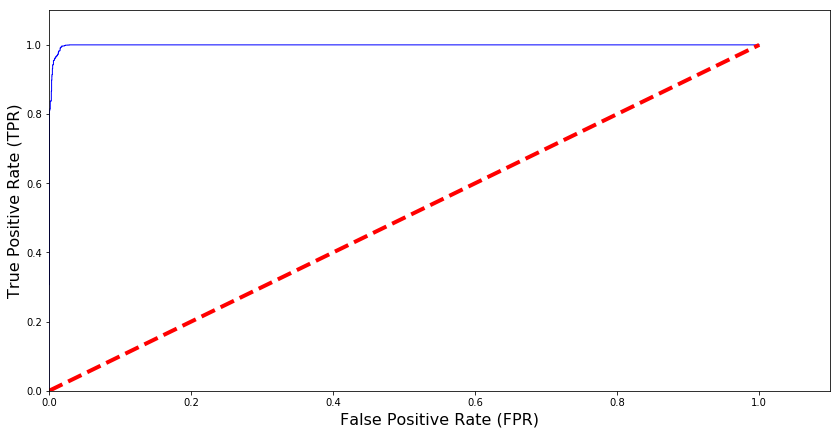

In [50]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate,'b', linewidth=1, label=label)
    plt.plot([0, 1], [0, 1], 'r--', linewidth=4)
    plt.axis([0, 1.1, 0, 1.1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_treino, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9985919295714839


#### 8. Vamos fazer algo diferente! Recupere as features mais importantes de um dos modelos baseado em árvore e treinar um novo modelo, de regressão logística, apenas com estas features. O modelo melhorou ou piorou? A métrica a ser avaliada deve ser a área sob a curva ROC

In [52]:
features_importance = zip(classifier_rf.feature_importances_, features)
features = []
for importance, feature in sorted(features_importance, reverse=True):
    
    print("%s: %f%%" % (feature, importance*100))
    features.append(feature)
    

fico: 40.724265%
debt_consolidation: 21.647101%
delinq.2yrs: 10.425965%
dti: 8.056021%
all_other: 5.752777%
days.with.cr.line: 5.419376%
educational: 2.309957%
credit.policy: 1.688318%
credit_card: 1.576241%
installment: 1.397878%
home_improvement: 0.461692%
revol.bal: 0.209981%
log.annual.inc: 0.091936%
int.rate: 0.080131%
major_purchase: 0.057666%
inq.last.6mths: 0.055108%
pub.rec: 0.031444%
not.fully.paid: 0.009387%
purpose: 0.004759%


In [53]:
features[0:6]

['fico',
 'debt_consolidation',
 'delinq.2yrs',
 'dti',
 'all_other',
 'days.with.cr.line']

In [54]:
X.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'all_other', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [55]:
X_importance = X[features[0:6]]
X_importance.head(2)                 

,fico,debt_consolidation,delinq.2yrs,dti,all_other,days.with.cr.line
0,737,1,0,19.48,0,5639.958333
1,707,0,0,14.29,0,2760.000000


Quantidade de Registros Treino:  10794

---
Quantidade de Registros de Teste:  4626

---
Acurácia Final: 0.6815823605706874
Confusion Matrix 
[[1628  720]
 [ 753 1525]]


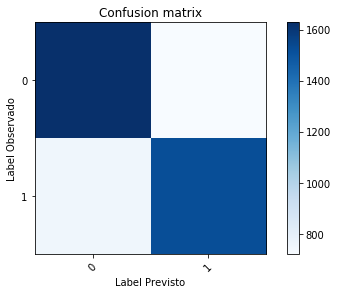

In [56]:
modelo_RL = LogisticRegression()

teste_size = 0.3

X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X_importance, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = 24)


print("Quantidade de Registros Treino: ", X_treino.shape[0])
print()
print("---")
print("Quantidade de Registros de Teste: ", X_teste.shape[0])
print()
print("---")


modelo_RL.fit(X_treino, Y_treino)
result = modelo_RL.score(X_teste, Y_teste)

previsoes = modelo_RL.predict(X_teste)

credit = encode_text_index(datasetUnificado,'credit.policy')

#y_compare = np.argmax(Y_teste,axis=1)
score = metrics.accuracy_score(Y_teste, previsoes)
print("Acurácia Final: {}".format(score))

# Confusion matrix
cm = confusion_matrix(Y_teste, previsoes)
np.set_printoptions(precision=2)
print('Confusion Matrix ')
print(cm)
plt.figure()
plot_confusion_matrix(cm, credit)
plt.show()

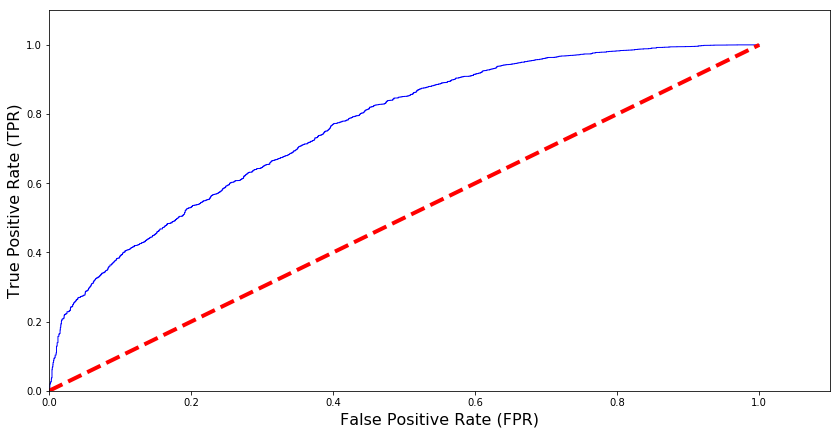

In [57]:
y_scores = modelo_RL.predict_proba(X_treino)
y_scores = y_scores[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_treino, y_scores)


# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate,'b', linewidth=1, label=label)
    plt.plot([0, 1], [0, 1], 'r--', linewidth=4)
    plt.axis([0, 1.1, 0, 1.1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### *8.1 Outra forma interessante de propor uma processo de feature engineering, seria aplicar o PCA apenas sobre os dados numéricos e após isto aplicar os demais tratamento dos dados. Lembre-se de normalizar os dados antes de aplicar o PCA.

In [58]:
dataset.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [59]:
datasetParaNor = dataset.drop(["credit.policy"],axis=1)
datasetParaNor = datasetParaNor.drop(["purpose"],axis=1)
datasetParaNor.head(2)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [60]:
datasetParaNor.shape

(9578, 12)

In [61]:
dataset.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [62]:
dataset02 = dataset[['credit.policy', 'purpose']]
dataset02.head(2)

,credit.policy,purpose
0,1,debt_consolidation
1,1,credit_card


In [63]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

datasetNormalizado = pd.DataFrame(scaler.fit_transform(datasetParaNor),columns=datasetParaNor.columns)

datasetNormalizado.head(2)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.43223,0.353732,0.182704,-0.716989,-0.29973,-0.237003,-0.436524
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.72123,0.495018,1.030602,-0.716989,-0.29973,-0.237003,-0.436524


In [64]:
datasetNormalizado.shape

(9578, 12)

In [65]:
datasetNormalizado.tail()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.29973,-0.237003,2.290825
9574,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.29973,-0.237003,2.290825
9575,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.29973,-0.237003,2.290825
9576,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.29973,-0.237003,2.290825
9577,0.616859,2.580601,0.540594,0.533633,0.557137,0.071785,0.621105,0.351594,2.010122,-0.29973,-0.237003,2.290825


In [66]:
dataset02.shape

(9578, 2)

In [67]:
dataset02.tail()

,credit.policy,purpose
9573,0,all_other
9574,0,all_other
9575,0,debt_consolidation
9576,0,home_improvement
9577,0,debt_consolidation


In [68]:
#Unificando os dataframes
datasetUnificadoNormalizado = pd.concat([datasetNormalizado,dataset02],axis=1)
datasetUnificadoNormalizado.shape

(9578, 14)

In [69]:
datasetUnificadoNormalizado.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit.policy,purpose
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524,1,debt_consolidation
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524,1,credit_card
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524,1,debt_consolidation
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524,1,debt_consolidation
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524,1,credit_card


In [70]:
purpose_com_hot_datasetUnificadoNormalizado = pd.get_dummies(datasetUnificadoNormalizado["purpose"])

In [71]:
purpose_com_hot_datasetUnificadoNormalizado.head(2)

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0


In [72]:
purpose_com_hot_datasetUnificadoNormalizado.shape

(9578, 7)

In [73]:
#Unificando os dataframes
datasetUnificado_datasetUnificadoNormalizado = pd.concat([datasetUnificadoNormalizado,purpose_com_hot_datasetUnificadoNormalizado],axis=1)

In [74]:
datasetUnificado_datasetUnificadoNormalizado.shape

(9578, 21)

In [75]:
datasetUnificado_datasetUnificadoNormalizado.head(2)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,...,not.fully.paid,credit.policy,purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.43223,0.353732,0.182704,-0.716989,-0.29973,...,-0.436524,1,debt_consolidation,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.72123,0.495018,1.030602,-0.716989,-0.29973,...,-0.436524,1,credit_card,0,1,0,0,0,0,0


In [76]:
# Separando a maioria e a minoria das classes
df_maioria = datasetUnificado_datasetUnificadoNormalizado[datasetUnificado_datasetUnificadoNormalizado["credit.policy"]==1]
df_minoria = datasetUnificado_datasetUnificadoNormalizado[datasetUnificado_datasetUnificadoNormalizado["credit.policy"]==0]

qtd_maioria = len(df_maioria)
qtd_minoria = len(df_minoria)
 
# Upsample da classe minoria
df_minoria_upsampled = resample(df_minoria, 
                         replace=True,     
                         n_samples=qtd_maioria,    
                         random_state=50) 
 
# Combinando a classe maioria com upsampled da classe minoria
df_upsampled_purpose_com_hot_datasetUnificadoNormalizado = pd.concat([df_maioria, df_minoria_upsampled])
 
# Valores
df_upsampled_purpose_com_hot_datasetUnificadoNormalizado["credit.policy"].value_counts()

1    7710
0    7710
Name: credit.policy, dtype: int64

In [77]:
#Separandop X e Y
Y_Norm = df_upsampled_purpose_com_hot_datasetUnificadoNormalizado["credit.policy"]
X_Norm = datasetUnificado.drop(["credit.policy"],axis=1)
X_Norm = X_Norm.drop(["purpose"],axis=1)

In [78]:
Y_Norm.head(2)

0    1
1    1
Name: credit.policy, dtype: int64

In [79]:
X_Norm.head(2)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0


#### 8.2 Plot a área sob a curva ROC

---
valor de i:  2
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 2)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.5914396887159533
[[1333 1017]
 [ 873 1403]]
---


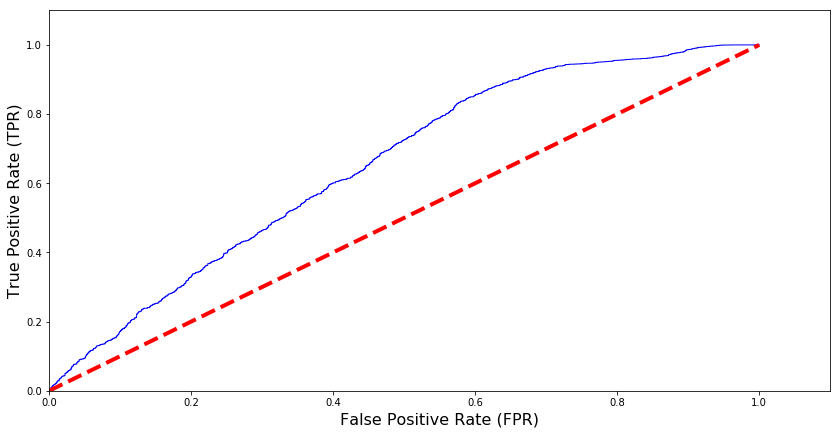

CART
0.8795936013834846
[[2264   86]
 [ 471 1805]]
---


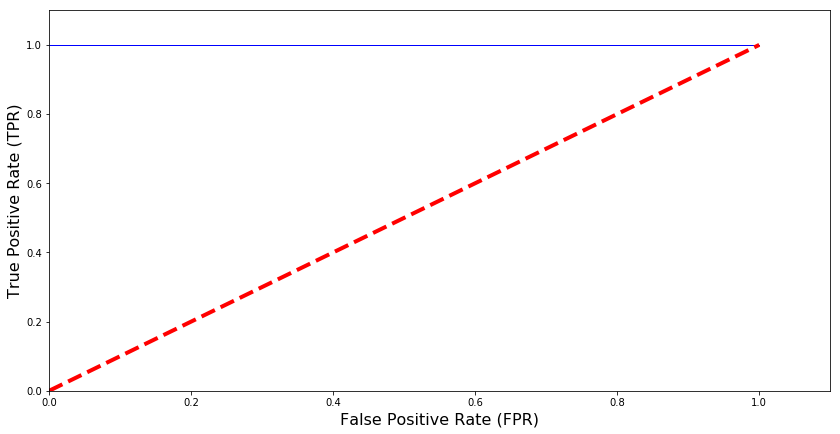

RFC
0.8748378728923476
[[2255   95]
 [ 484 1792]]
---


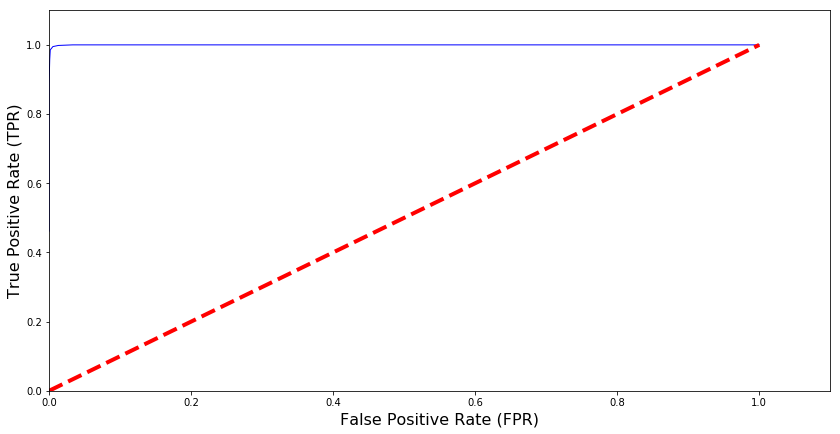

---
valor de i:  3
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 3)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.6041936878512754
[[1354  996]
 [ 835 1441]]
---


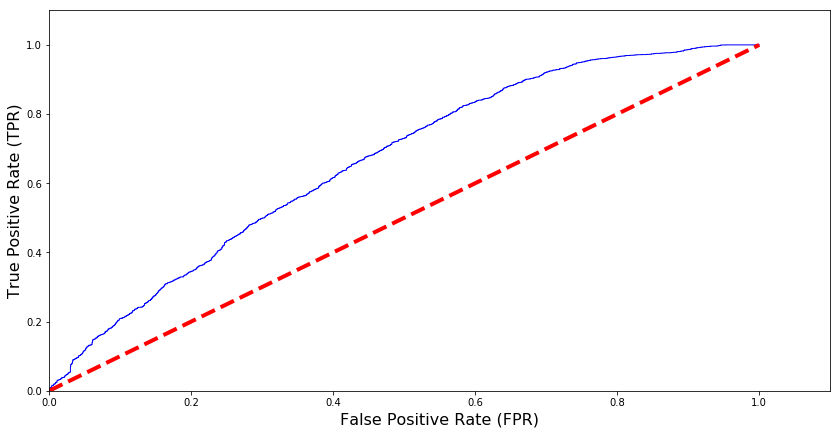

CART
0.8837008214440121
[[2274   76]
 [ 462 1814]]
---


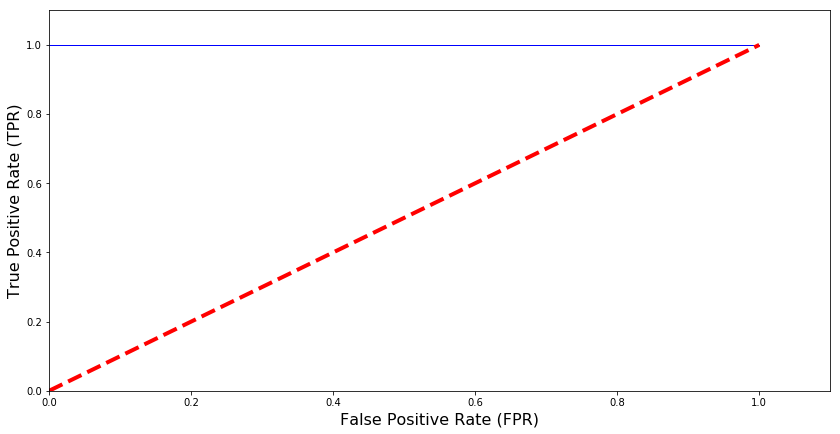

RFC
0.8949416342412452
[[2259   91]
 [ 395 1881]]
---


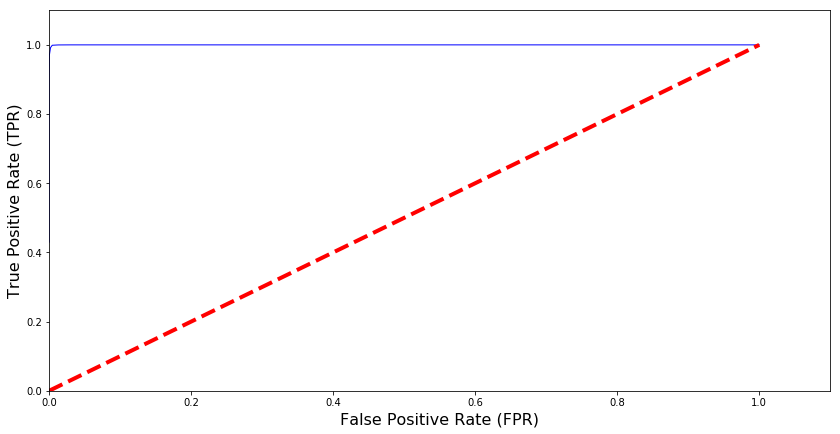

---
valor de i:  4
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 4)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.6744487678339819
[[1645  705]
 [ 801 1475]]
---


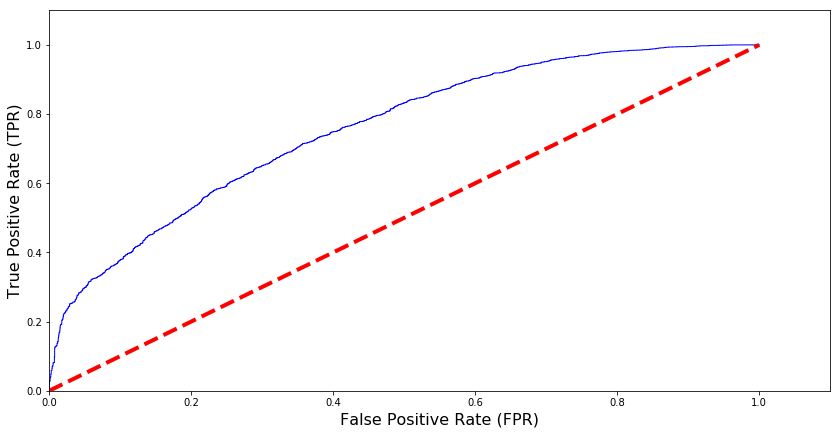

CART
0.9029399048854302
[[2297   53]
 [ 396 1880]]
---


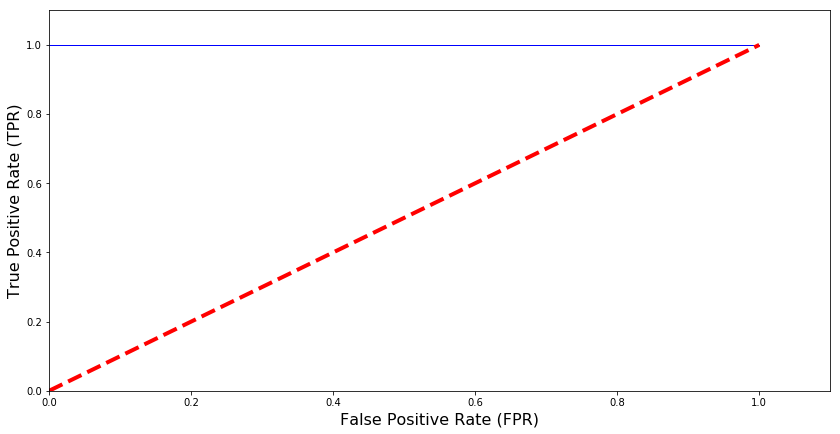

RFC
0.906398616515348
[[2282   68]
 [ 365 1911]]
---


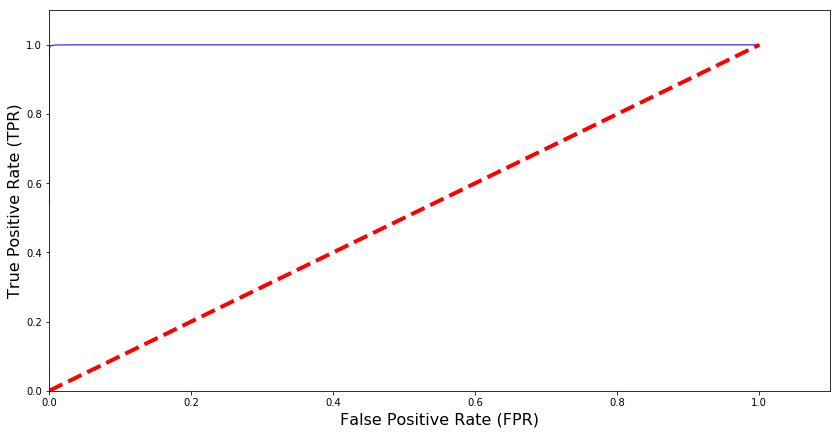

---
valor de i:  5
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 5)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.7207090358841332
[[1745  605]
 [ 687 1589]]
---


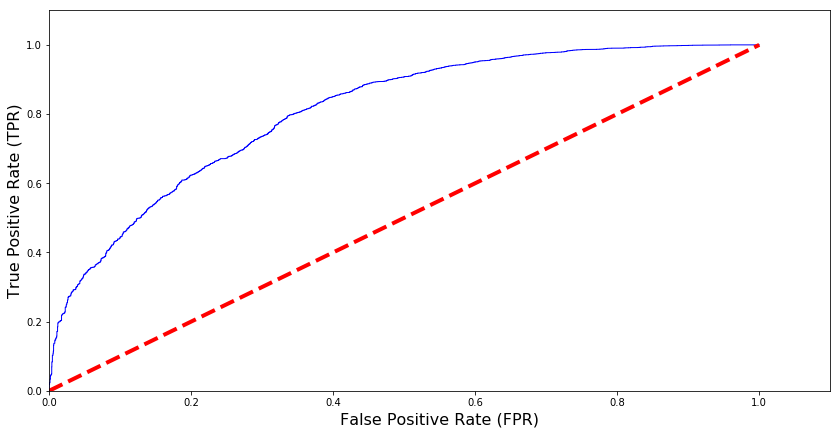

CART
0.916126242974492
[[2287   63]
 [ 325 1951]]
---


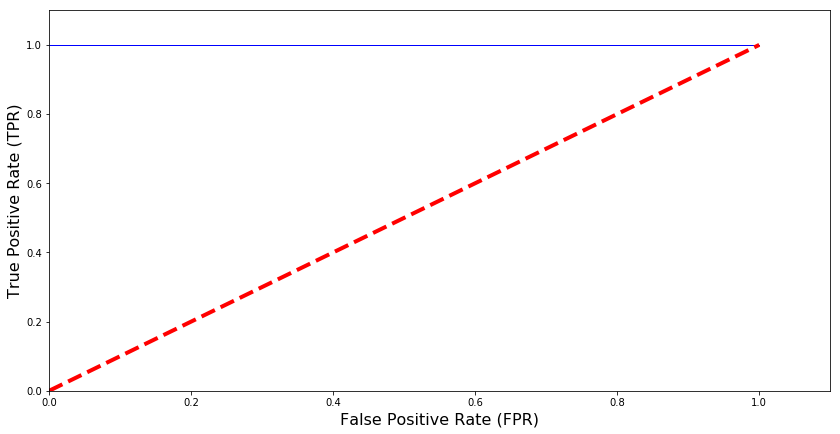

RFC
0.9221789883268483
[[2281   69]
 [ 291 1985]]
---


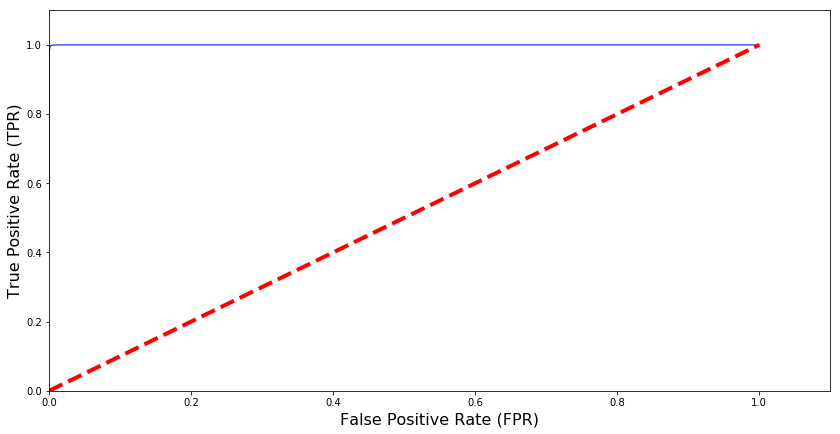

---
valor de i:  6
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 6)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.7183311716385646
[[1742  608]
 [ 695 1581]]
---


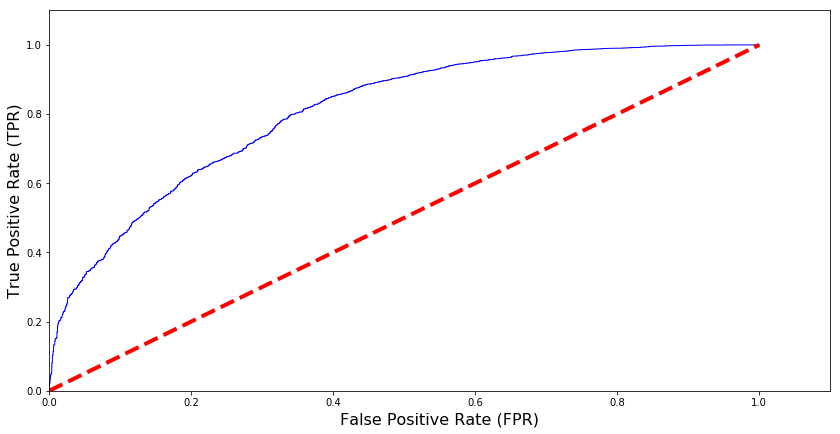

CART
0.9198011240812797
[[2288   62]
 [ 309 1967]]
---


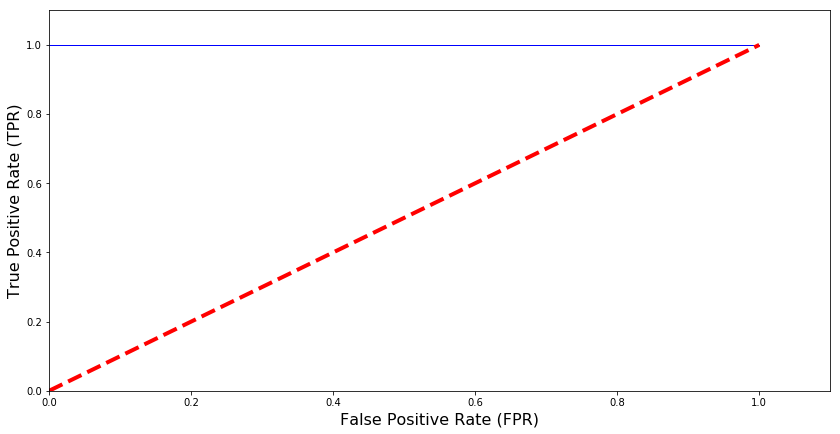

RFC
0.9262862083873757
[[2290   60]
 [ 281 1995]]
---


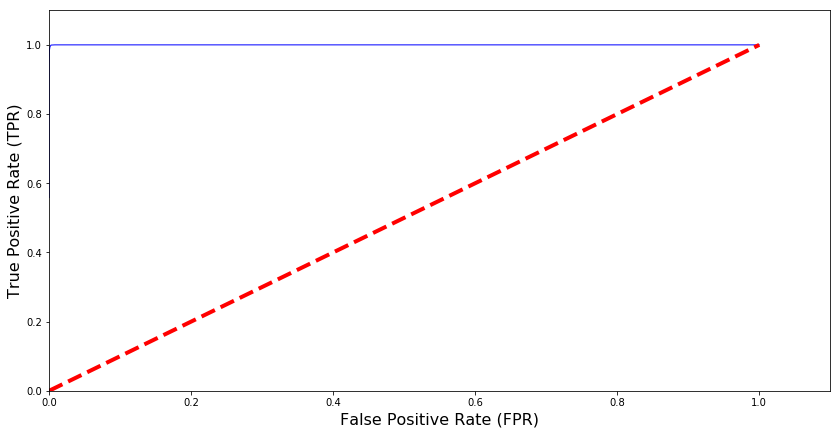

---
valor de i:  7
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 7)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.8374405533938608
[[1890  460]
 [ 292 1984]]
---


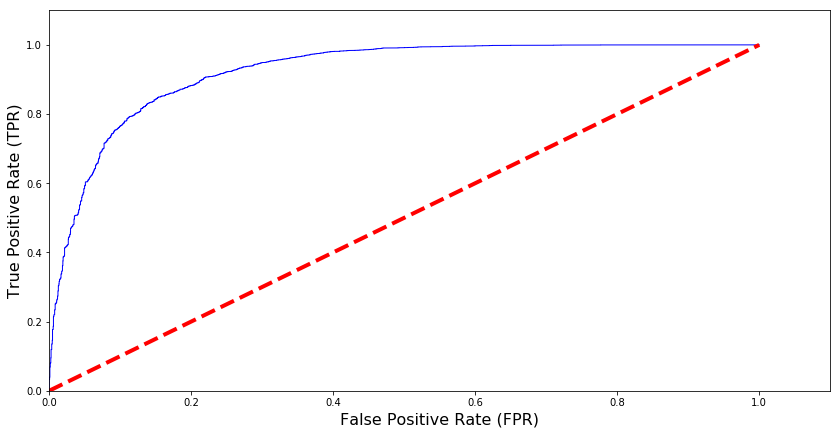

CART
0.9747081712062257
[[2327   23]
 [  94 2182]]
---


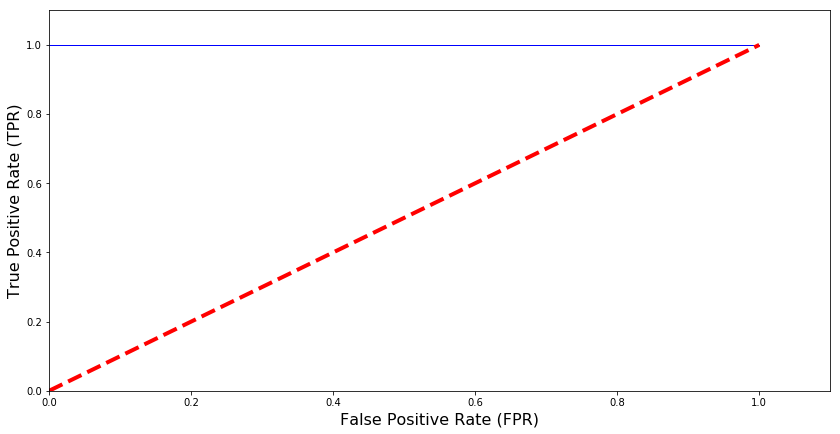

RFC
0.9803285776048422
[[2333   17]
 [  74 2202]]
---


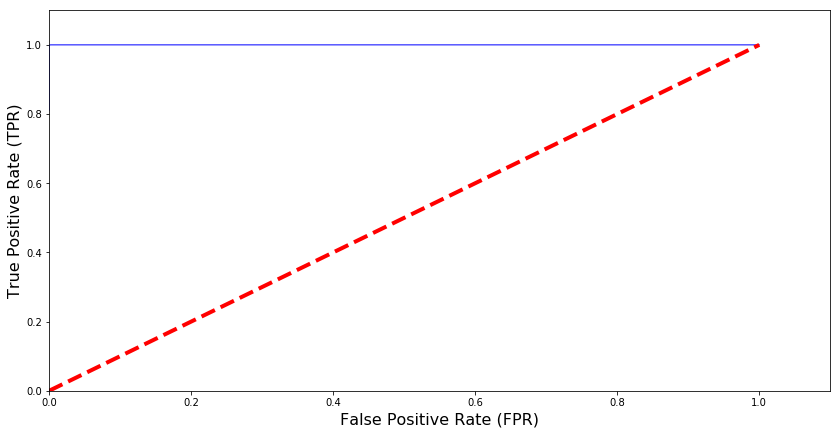

---
valor de i:  8
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 8)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.8398184176394293
[[1904  446]
 [ 295 1981]]
---


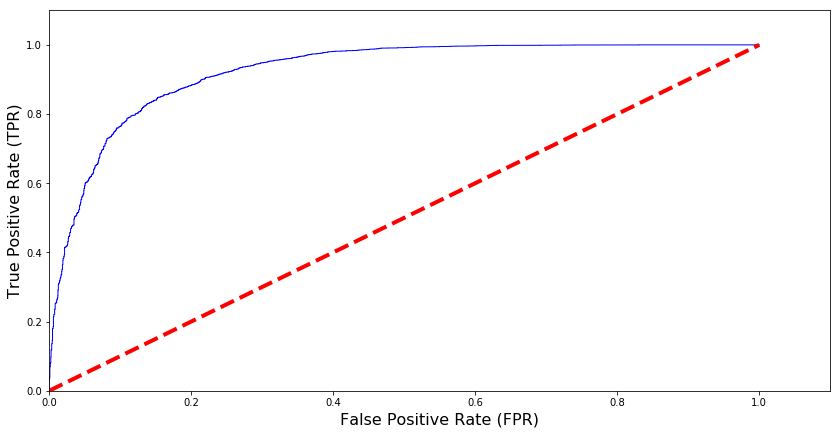

CART
0.9727626459143969
[[2327   23]
 [ 103 2173]]
---


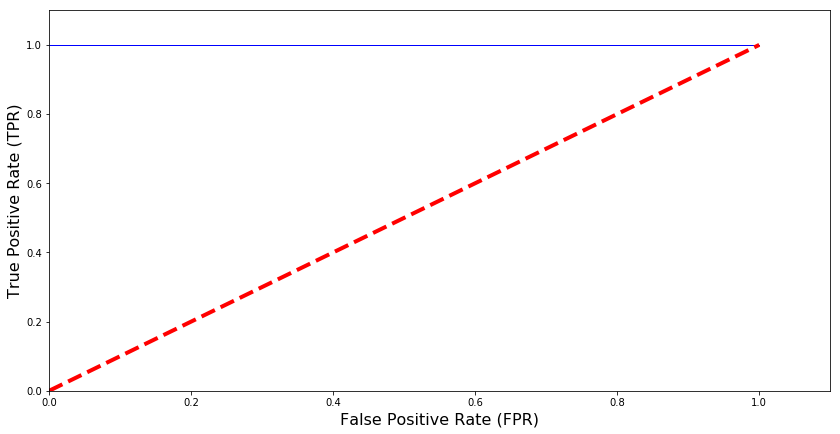

RFC
0.9807609165585819
[[2338   12]
 [  77 2199]]
---


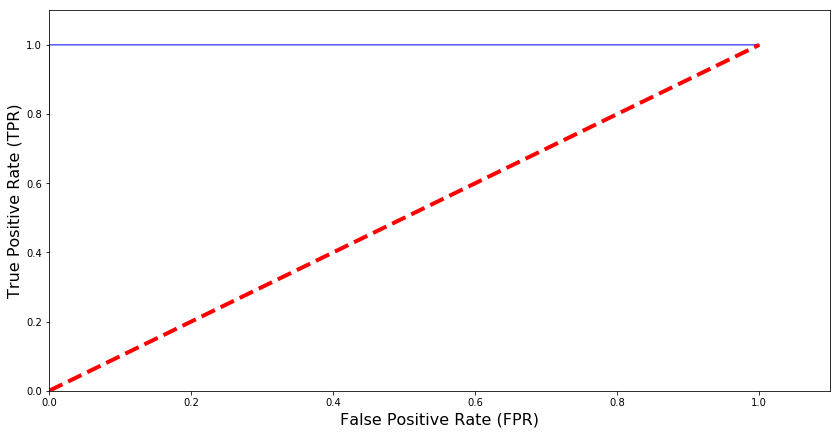

---
valor de i:  9
---
Quantidade de Registros pos PCA:  15420
Quantidade de Registros shape pos PCA:  (15420, 9)
---
Quantidade de Registros Treino X_treino:  10794

---
Quantidade de Registros de Teste X_teste:  4626

---
LR
0.8411154345006485
[[1924  426]
 [ 309 1967]]
---


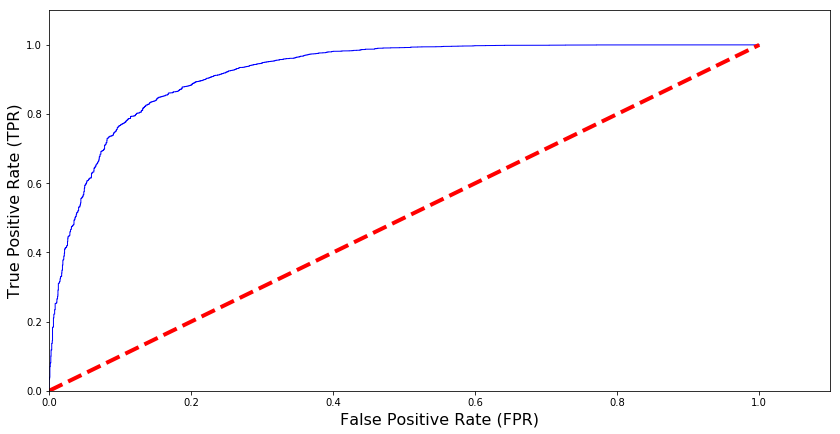

CART
0.9792477302204928
[[2329   21]
 [  75 2201]]
---


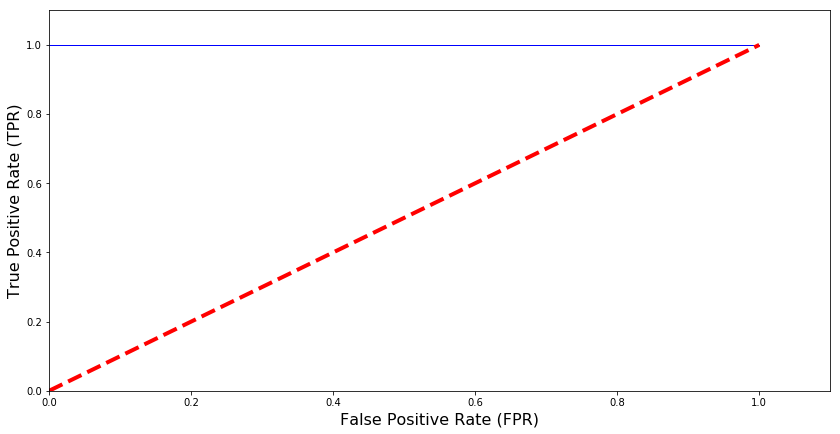

RFC
0.9794638996973627
[[2332   18]
 [  77 2199]]
---


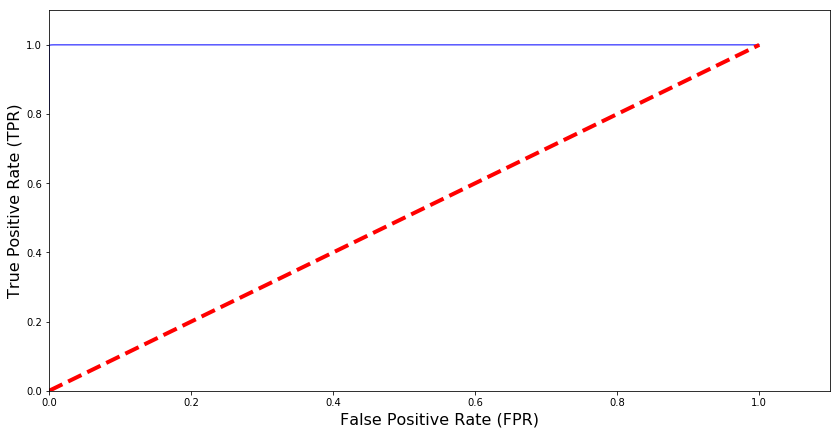

In [80]:
from sklearn import decomposition

for i in range(2,10):
    
    print("---")
    print("valor de i: ", i)
    print("---")
    
    pca = decomposition.PCA(n_components=i)
    X_std_pca = pca.fit_transform(X_Norm)

    print("Quantidade de Registros pos PCA: ",X_std_pca.shape[0])
    print("Quantidade de Registros shape pos PCA: ",X_std_pca.shape)
    print("---")

    teste_size = 0.3

    X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X_std_pca, Y_Norm, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)


    print("Quantidade de Registros Treino X_treino: ", X_treino.shape[0])
    print()
    print("---")
    print("Quantidade de Registros de Teste X_teste: ", X_teste.shape[0])
    print()
    print("---")

    # Criando o modelo
    modelos = []
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('CART', DecisionTreeClassifier()))
    modelos.append(('RFC', RandomForestClassifier()))



    resultados = []
    nomes = []
    for nome, modelo in modelos:
        print(nome)

        modelo.fit(X_treino, Y_treino)
        result = modelo.score(X_teste, Y_teste)
        print(result.mean())
        previsoes = modelo.predict(X_teste)
        matrix = confusion_matrix(Y_teste, previsoes)
        print(matrix)

        print("---")
        
        #modelo_RL = LogisticRegression()

        y_scores = modelo.predict_proba(X_treino)
        y_scores = y_scores[:,1]

        false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_treino, y_scores)


        # plotting them against each other
        def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
            plt.plot(false_positive_rate, true_positive_rate,'b', linewidth=1, label=label)
            plt.plot([0, 1], [0, 1], 'r--', linewidth=4)
            plt.axis([0, 1.1, 0, 1.1])
            plt.xlabel('False Positive Rate (FPR)', fontsize=16)
            plt.ylabel('True Positive Rate (TPR)', fontsize=16)

        plt.figure(figsize=(14, 7))
        plot_roc_curve(false_positive_rate, true_positive_rate)
        plt.show()


#### 9. Como investidor você não quer emprestar o dinheiro para pessoas que não possam pagar, ou seja, você quer evitar a todo custo os maus pagadores, não importa o resto ... Qual a melhor métrica para avaliar? Qual o melhor modelo considerando esta métrica?

#### 10. Construa um modelo ensemble com RL e Random Forest

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()


eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')

for clf, label in zip([clf1, clf2,  eclf], ['Logistic Regression', 'Random Forest',  'Ensemble']):
    scores = cross_val_score(clf, X_Norm, Y_Norm, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.81 (+/- 0.01) [Logistic Regression]
Accuracy: 0.99 (+/- 0.00) [Random Forest]


/home/ramses/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ramses/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ramses/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ramses/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

Accuracy: 0.92 (+/- 0.01) [Ensemble]


/home/ramses/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
